# 1.**Data Preparation**

# **Importing necessary libraries**

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [52]:
# Load the dataset
df= pd.read_csv(r"D:\RATHNA\PYTHON\Kaggle\card_transdata.csv")

In [53]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [56]:
# Check for missing values
print(df.isnull().sum())

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64


In [58]:
# Basic statistics of the dataset
print(df.describe())

       distance_from_home  distance_from_last_transaction  \
count      1000000.000000                  1000000.000000   
mean            26.628792                        5.036519   
std             65.390784                       25.843093   
min              0.004874                        0.000118   
25%              3.878008                        0.296671   
50%              9.967760                        0.998650   
75%             25.743985                        3.355748   
max          10632.723672                    11851.104565   

       ratio_to_median_purchase_price  repeat_retailer       used_chip  \
count                  1000000.000000   1000000.000000  1000000.000000   
mean                         1.824182         0.881536        0.350399   
std                          2.799589         0.323157        0.477095   
min                          0.004399         0.000000        0.000000   
25%                          0.475673         1.000000        0.000000   
50%   

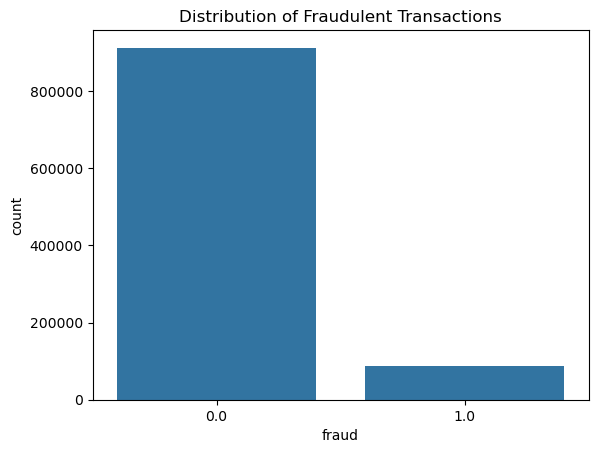

In [60]:

# Check the distribution of the target variable (fraud)
sns.countplot(x='fraud', data=df)
plt.title('Distribution of Fraudulent Transactions')
plt.show()

# 2: **Exploratory Data Analysis (EDA)**

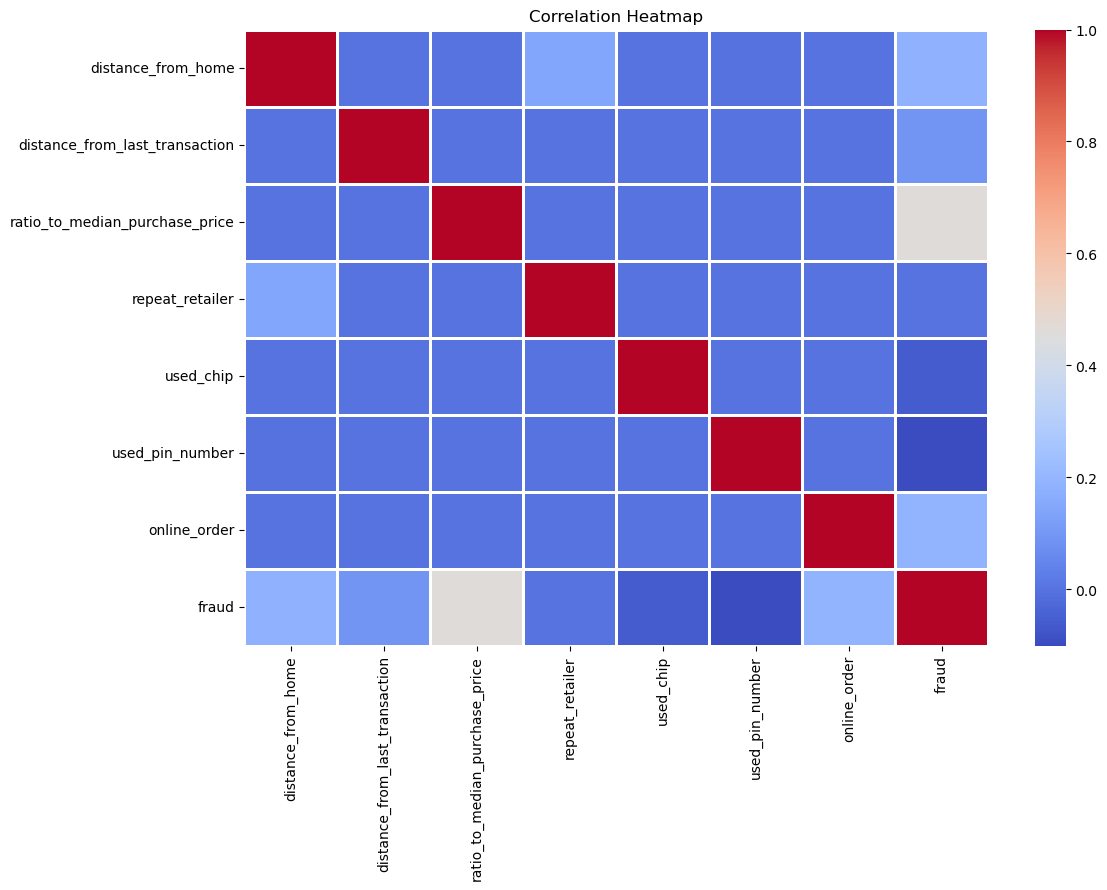

In [62]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Heatmap')
plt.show()

# 3: **Data Splitting**

In [66]:
# Features and target variable
X = df.drop('fraud', axis=1)  
y = df['fraud']  

In [68]:
# Splitting the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4: **Model Training**

In [104]:
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# 5: **Model Evaluation**

In [106]:
classifier = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=42)
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)
# Predict on the test set
y_pred = classifier.predict(X_test)

In [108]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[181287   1270]
 [  5332  12111]]


In [110]:
# Classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)


Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98    182557
         1.0       0.91      0.69      0.79     17443

    accuracy                           0.97    200000
   macro avg       0.94      0.84      0.88    200000
weighted avg       0.97      0.97      0.96    200000



In [112]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97


In [114]:
# Initialize and train the Decision Tree Classifier
classifier = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

In [115]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97


In [118]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98    182557
         1.0       0.91      0.69      0.79     17443

    accuracy                           0.97    200000
   macro avg       0.94      0.84      0.88    200000
weighted avg       0.97      0.97      0.96    200000



# 6: **Interpretation of Results**

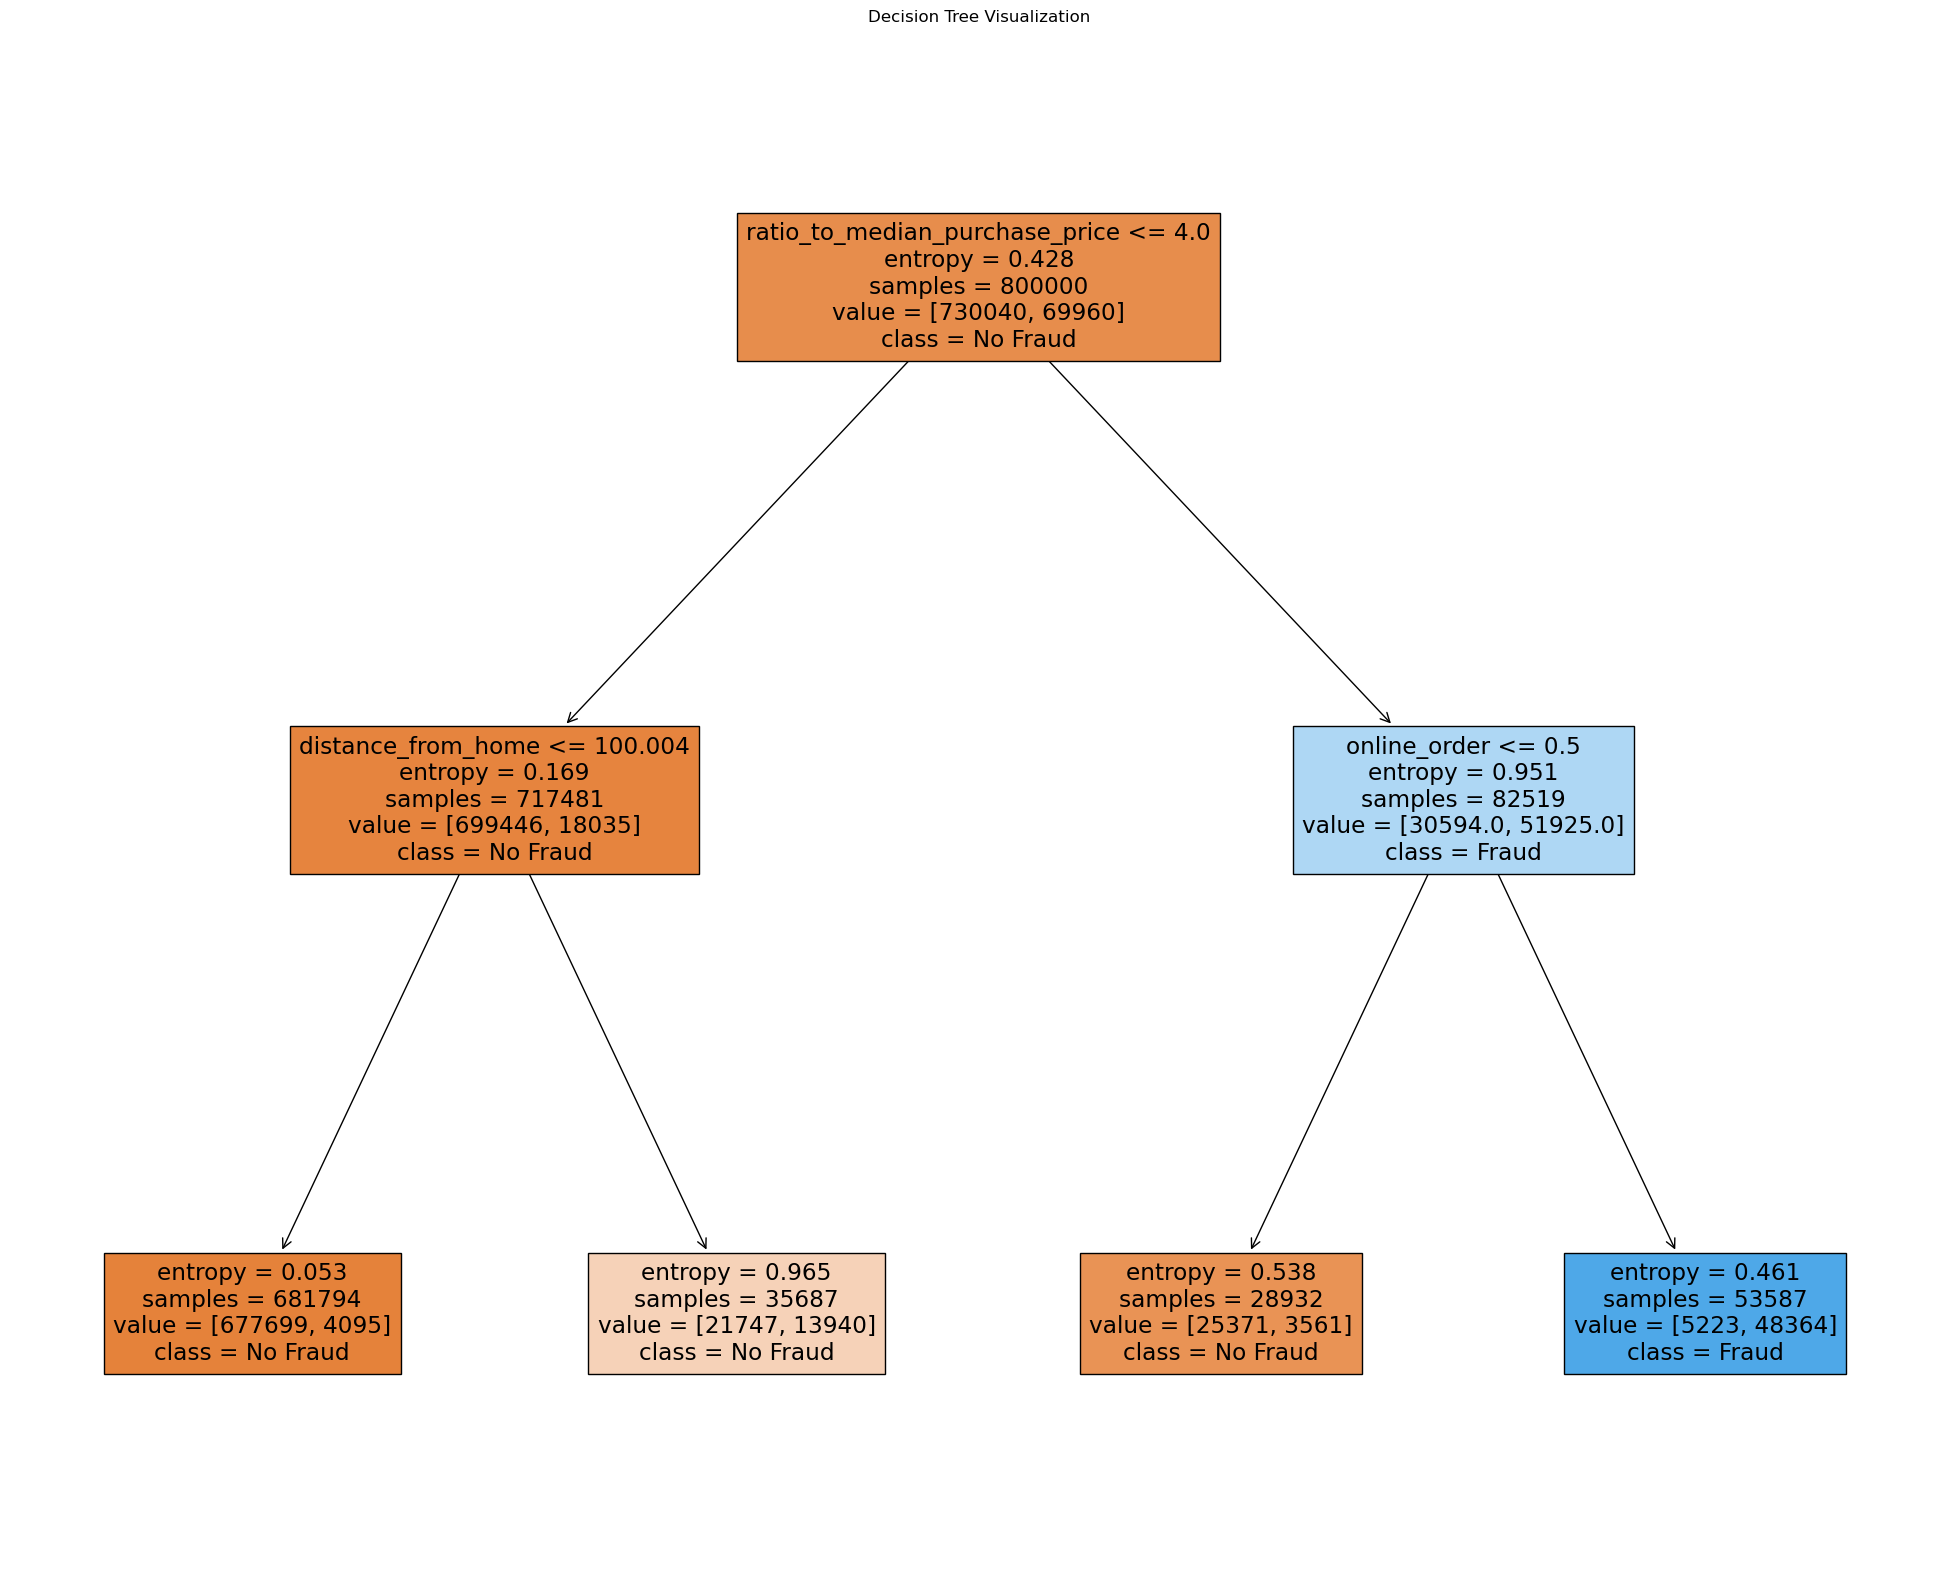

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree 
%matplotlib inline
fig = plt.figure(figsize=(25, 20))
tree.plot_tree(classifier,
               feature_names=X.columns,
               class_names=['No Fraud', 'Fraud'],
               filled=True)
plt.title('Decision Tree Visualization')
plt.show()


# **Decision Tree Regressor**

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree

In [128]:
regressor = DecisionTreeRegressor(random_state=42)

In [132]:
# Fit the model on the training data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [140]:
# Initialize and train the Decision Tree Regressor
regressor = DecisionTreeRegressor(max_depth=4, random_state=42)
regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = regressor.predict(X_test)

In [142]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 0.01
R-squared: 0.93


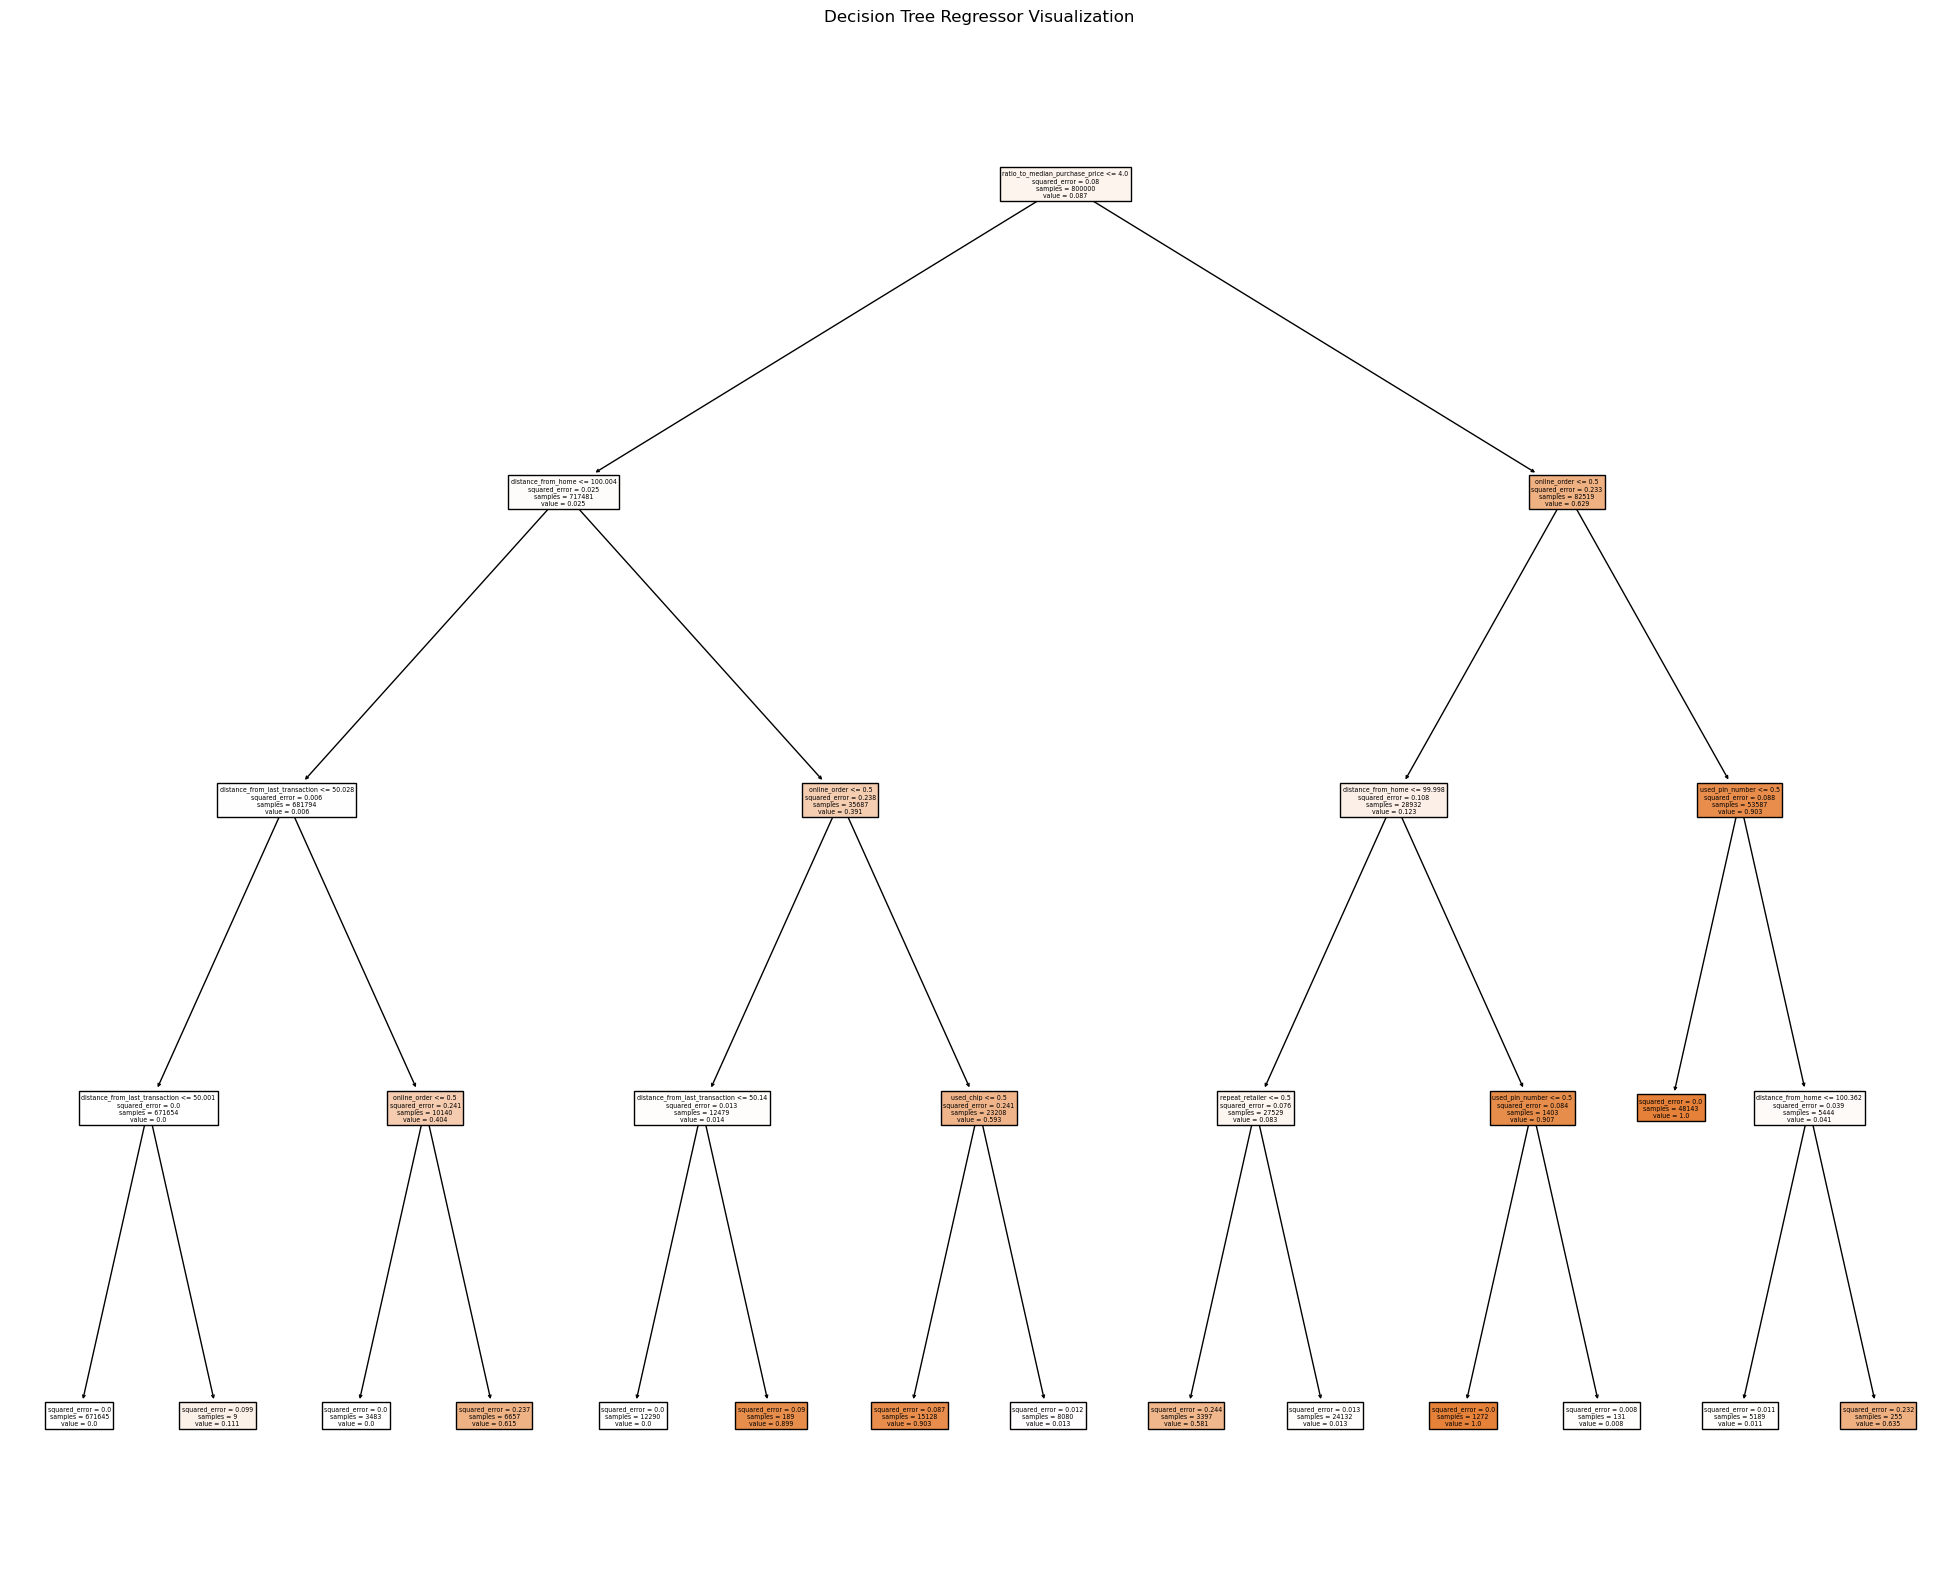

In [150]:
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
fig = plt.figure(figsize=(25, 20))
tree.plot_tree(regressor,
               feature_names=X.columns,
               filled=True)
plt.title('Decision Tree Regressor Visualization')
plt.show()